🛍️  Customer Segmentation with K-Means Clustering
Data loaded successfully!
Dataset shape: (200, 5)

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Data preprocessing completed!
Features used for clustering: ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_encoded']
Scaled data shape: (200, 4)


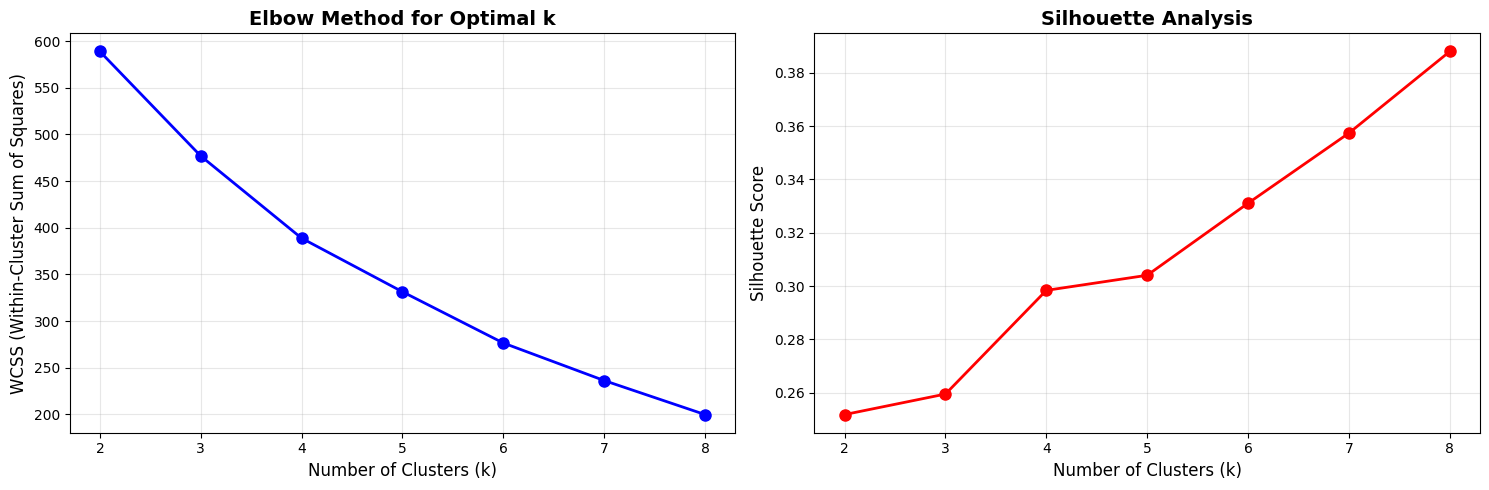

Optimal number of clusters based on Silhouette Score: 8
Silhouette Score for k=8: 0.388
K-means clustering completed with 8 clusters!
Silhouette Score: 0.388


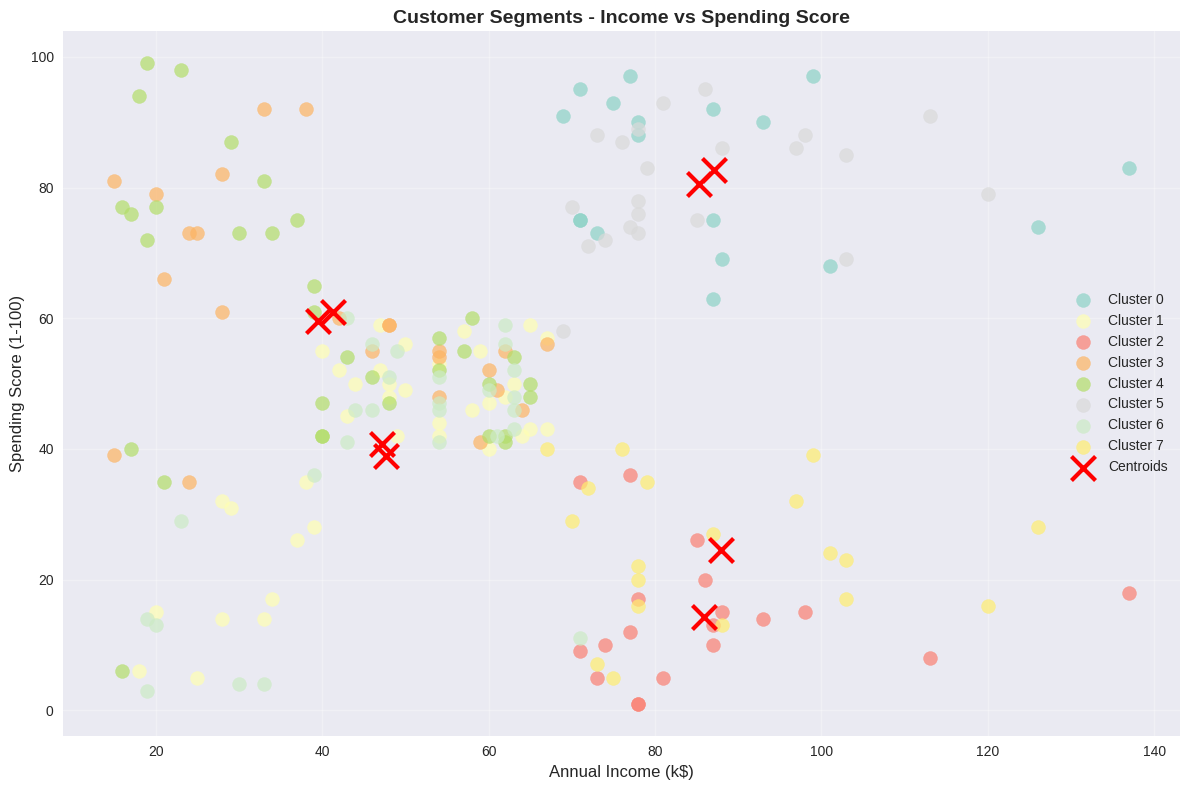

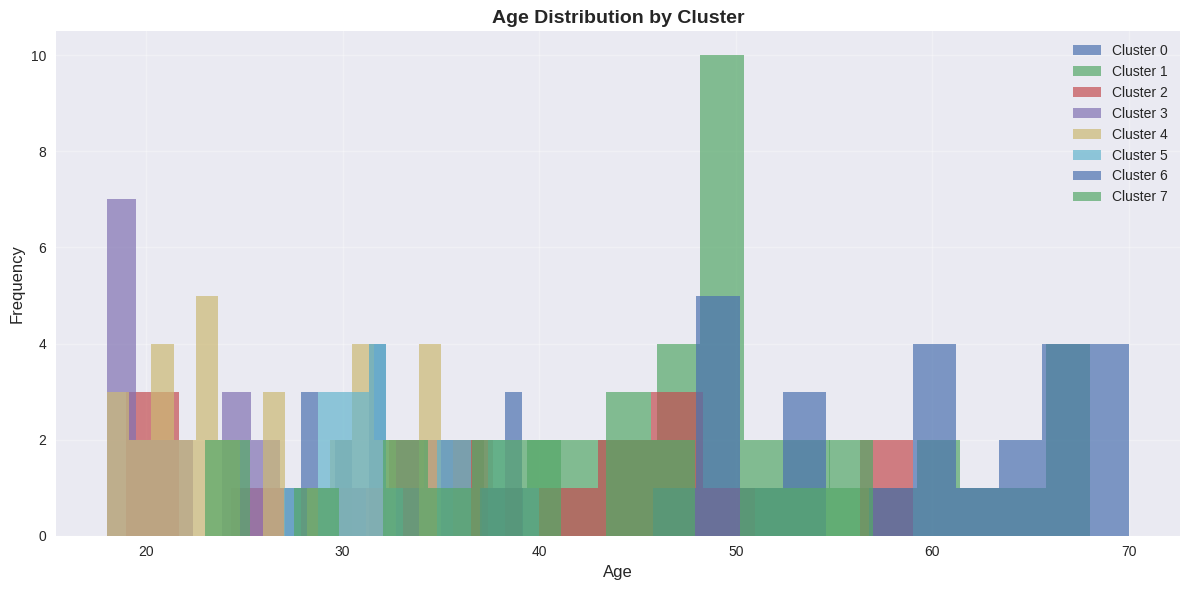

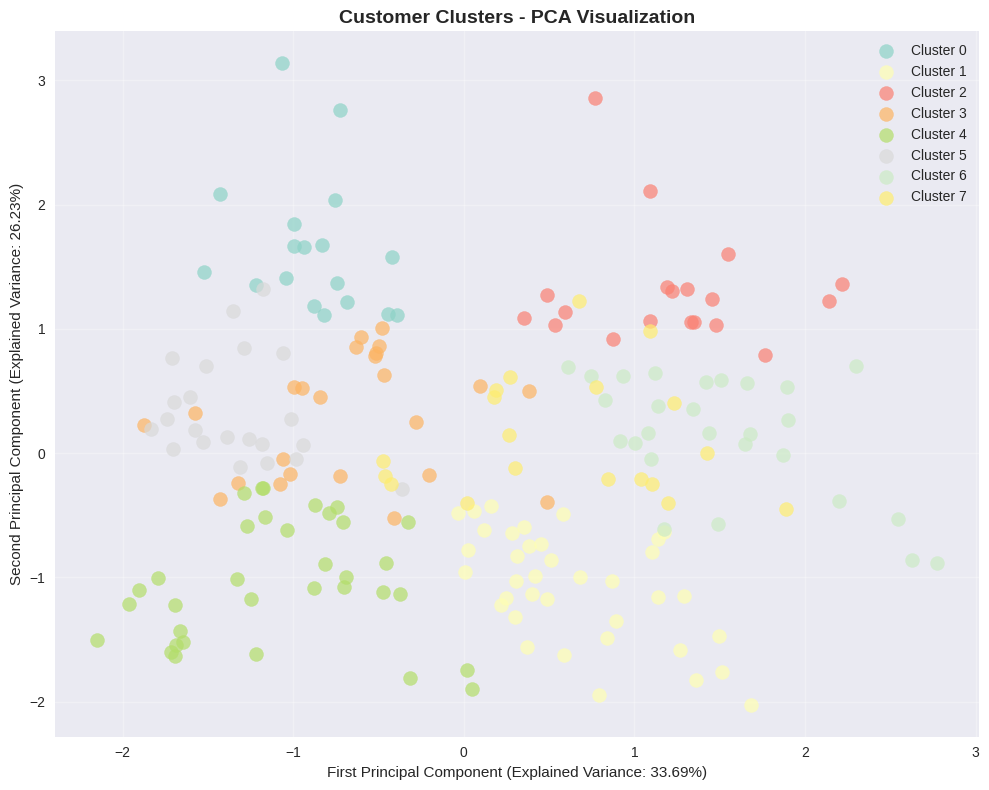

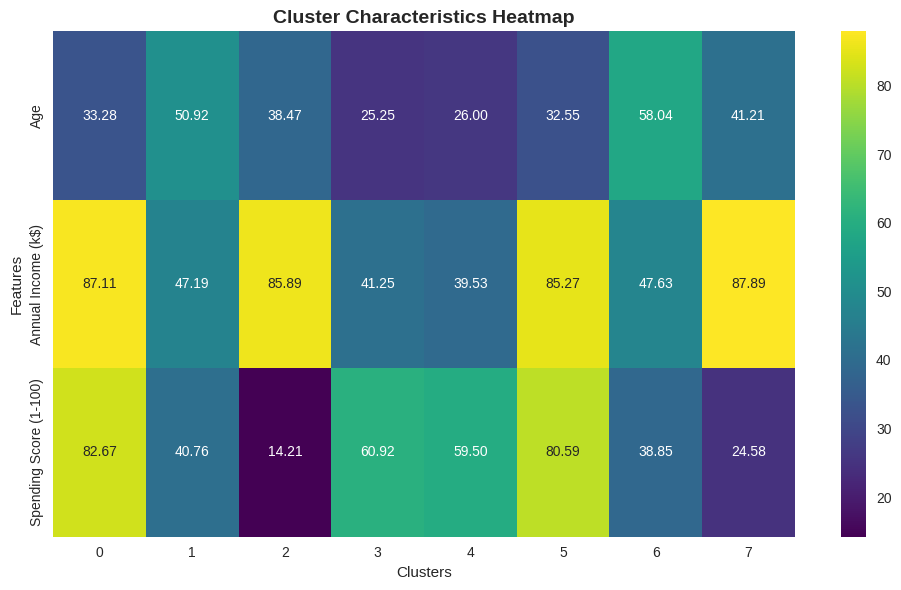

CUSTOMER SEGMENTATION ANALYSIS

🎯 CLUSTER 0 (n=18 customers)
----------------------------------------
Age: 33.3 ± 4.4 years
Annual Income: $87.1k ± $18.9k
Spending Score: 82.7 ± 11.1
Gender: {'Male': 18}

🎯 CLUSTER 1 (n=37 customers)
----------------------------------------
Age: 50.9 ± 8.9 years
Annual Income: $47.2k ± $13.8k
Spending Score: 40.8 ± 15.4
Gender: {'Female': 37}

🎯 CLUSTER 2 (n=19 customers)
----------------------------------------
Age: 38.5 ± 12.0 years
Annual Income: $85.9k ± $16.1k
Spending Score: 14.2 ± 9.8
Gender: {'Male': 19}

🎯 CLUSTER 3 (n=24 customers)
----------------------------------------
Age: 25.2 ± 6.9 years
Annual Income: $41.2k ± $17.2k
Spending Score: 60.9 ± 15.8
Gender: {'Male': 24}

🎯 CLUSTER 4 (n=34 customers)
----------------------------------------
Age: 26.0 ± 5.3 years
Annual Income: $39.5k ± $17.1k
Spending Score: 59.5 ± 20.1
Gender: {'Female': 34}

🎯 CLUSTER 5 (n=22 customers)
----------------------------------------
Age: 32.5 ± 3.4 years
Annual 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

class CustomerSegmentation:
    def __init__(self):
        self.data = None
        self.scaled_data = None
        self.kmeans = None
        self.scaler = StandardScaler()
        self.optimal_clusters = None
        self.labels = None

    def load_data(self, file_path=None, sample_data=False):
        """Load customer data from CSV file or generate sample data"""
        if sample_data:
            # Generate sample data for demonstration
            np.random.seed(42)
            n_customers = 200

            self.data = pd.DataFrame({
                'CustomerID': range(1, n_customers + 1),
                'Gender': np.random.choice(['Male', 'Female'], n_customers),
                'Age': np.random.normal(40, 12, n_customers).astype(int),
                'Annual Income (k$)': np.random.normal(60, 20, n_customers),
                'Spending Score (1-100)': np.random.normal(50, 25, n_customers)
            })

            # Ensure realistic ranges
            self.data['Age'] = np.clip(self.data['Age'], 18, 70)
            self.data['Annual Income (k$)'] = np.clip(self.data['Annual Income (k$)'], 15, 150)
            self.data['Spending Score (1-100)'] = np.clip(self.data['Spending Score (1-100)'], 1, 100)

        else:
            if file_path is None:
                raise ValueError("Please provide a file path or set sample_data=True")
            self.data = pd.read_csv(file_path)

        print("Data loaded successfully!")
        print(f"Dataset shape: {self.data.shape}")
        print("\nFirst few rows:")
        print(self.data.head())
        return self.data

    def preprocess_data(self):
        """Preprocess the data for clustering"""
        if self.data is None:
            raise ValueError("No data loaded. Please load data first.")

        # Create a copy for processing
        processed_data = self.data.copy()

        # Handle missing values
        processed_data = processed_data.dropna()

        # Encode categorical variables
        if 'Gender' in processed_data.columns:
            le = LabelEncoder()
            processed_data['Gender_encoded'] = le.fit_transform(processed_data['Gender'])

        # Select features for clustering (excluding CustomerID)
        feature_columns = []
        if 'Age' in processed_data.columns:
            feature_columns.append('Age')
        if 'Annual Income (k$)' in processed_data.columns:
            feature_columns.append('Annual Income (k$)')
        if 'Spending Score (1-100)' in processed_data.columns:
            feature_columns.append('Spending Score (1-100)')
        if 'Gender_encoded' in processed_data.columns:
            feature_columns.append('Gender_encoded')

        # Extract features for clustering
        features = processed_data[feature_columns]

        # Scale the features
        self.scaled_data = self.scaler.fit_transform(features)
        self.feature_names = feature_columns

        print("Data preprocessing completed!")
        print(f"Features used for clustering: {feature_columns}")
        print(f"Scaled data shape: {self.scaled_data.shape}")

        return self.scaled_data

    def find_optimal_clusters(self, max_clusters=10):
        """Find optimal number of clusters using Elbow method and Silhouette analysis"""
        if self.scaled_data is None:
            raise ValueError("Data not preprocessed. Please run preprocess_data() first.")

        # Calculate WCSS for different number of clusters
        wcss = []
        silhouette_scores = []
        K_range = range(2, max_clusters + 1)

        for k in K_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(self.scaled_data)
            wcss.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(self.scaled_data, kmeans.labels_))

        # Plot Elbow curve and Silhouette scores
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Elbow Method
        ax1.plot(K_range, wcss, 'bo-', linewidth=2, markersize=8)
        ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
        ax1.set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
        ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # Silhouette Analysis
        ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
        ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
        ax2.set_ylabel('Silhouette Score', fontsize=12)
        ax2.set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Find optimal k based on silhouette score
        optimal_k = K_range[np.argmax(silhouette_scores)]
        self.optimal_clusters = optimal_k

        print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")
        print(f"Silhouette Score for k={optimal_k}: {max(silhouette_scores):.3f}")

        return optimal_k

    def perform_clustering(self, n_clusters=None):
        """Perform K-means clustering"""
        if self.scaled_data is None:
            raise ValueError("Data not preprocessed. Please run preprocess_data() first.")

        if n_clusters is None:
            if self.optimal_clusters is None:
                self.find_optimal_clusters()
            n_clusters = self.optimal_clusters

        # Perform K-means clustering
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        self.labels = self.kmeans.fit_predict(self.scaled_data)

        # Add cluster labels to original data
        self.data['Cluster'] = self.labels

        print(f"K-means clustering completed with {n_clusters} clusters!")
        print(f"Silhouette Score: {silhouette_score(self.scaled_data, self.labels):.3f}")

        return self.labels

    def visualize_clusters(self):
        """Create comprehensive visualizations of the clusters"""
        if self.labels is None:
            raise ValueError("Clustering not performed. Please run perform_clustering() first.")

        # Set up the plotting style
        plt.style.use('seaborn-v0_8')
        colors = plt.cm.Set3(np.linspace(0, 1, len(np.unique(self.labels))))

        # 1. 2D Scatter plots for key features
        if 'Annual Income (k$)' in self.data.columns and 'Spending Score (1-100)' in self.data.columns:
            plt.figure(figsize=(12, 8))

            for i, cluster in enumerate(np.unique(self.labels)):
                cluster_data = self.data[self.data['Cluster'] == cluster]
                plt.scatter(cluster_data['Annual Income (k$)'],
                           cluster_data['Spending Score (1-100)'],
                           c=[colors[i]], label=f'Cluster {cluster}', alpha=0.7, s=100)

            # Plot centroids
            if self.scaled_data.shape[1] >= 2:
                # Get centroids in original scale
                centroids_scaled = self.kmeans.cluster_centers_

                # Find indices of Annual Income and Spending Score in scaled data
                income_idx = self.feature_names.index('Annual Income (k$)')
                spending_idx = self.feature_names.index('Spending Score (1-100)')

                # Transform centroids back to original scale
                temp_centroids = np.zeros((len(centroids_scaled), len(self.feature_names)))
                temp_centroids[:, :] = centroids_scaled
                centroids_original = self.scaler.inverse_transform(temp_centroids)

                plt.scatter(centroids_original[:, income_idx],
                           centroids_original[:, spending_idx],
                           c='red', marker='x', s=300, linewidths=3, label='Centroids')

            plt.xlabel('Annual Income (k$)', fontsize=12)
            plt.ylabel('Spending Score (1-100)', fontsize=12)
            plt.title('Customer Segments - Income vs Spending Score', fontsize=14, fontweight='bold')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        # 2. Age distribution by cluster
        if 'Age' in self.data.columns:
            plt.figure(figsize=(12, 6))

            for cluster in np.unique(self.labels):
                cluster_ages = self.data[self.data['Cluster'] == cluster]['Age']
                plt.hist(cluster_ages, alpha=0.7, label=f'Cluster {cluster}', bins=15)

            plt.xlabel('Age', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        # 3. PCA visualization for high-dimensional data
        if self.scaled_data.shape[1] > 2:
            pca = PCA(n_components=2)
            pca_data = pca.fit_transform(self.scaled_data)

            plt.figure(figsize=(10, 8))

            for i, cluster in enumerate(np.unique(self.labels)):
                mask = self.labels == cluster
                plt.scatter(pca_data[mask, 0], pca_data[mask, 1],
                           c=[colors[i]], label=f'Cluster {cluster}', alpha=0.7, s=100)

            plt.xlabel(f'First Principal Component (Explained Variance: {pca.explained_variance_ratio_[0]:.2%})')
            plt.ylabel(f'Second Principal Component (Explained Variance: {pca.explained_variance_ratio_[1]:.2%})')
            plt.title('Customer Clusters - PCA Visualization', fontsize=14, fontweight='bold')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

        # 4. Cluster characteristics heatmap
        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        numeric_columns = [col for col in numeric_columns if col not in ['CustomerID', 'Cluster']]

        if len(numeric_columns) > 0:
            cluster_means = self.data.groupby('Cluster')[numeric_columns].mean()

            plt.figure(figsize=(10, 6))
            sns.heatmap(cluster_means.T, annot=True, cmap='viridis', fmt='.2f')
            plt.title('Cluster Characteristics Heatmap', fontsize=14, fontweight='bold')
            plt.ylabel('Features')
            plt.xlabel('Clusters')
            plt.tight_layout()
            plt.show()

    def analyze_clusters(self):
        """Provide detailed analysis of each cluster"""
        if self.labels is None:
            raise ValueError("Clustering not performed. Please run perform_clustering() first.")

        print("="*60)
        print("CUSTOMER SEGMENTATION ANALYSIS")
        print("="*60)

        for cluster in np.unique(self.labels):
            cluster_data = self.data[self.data['Cluster'] == cluster]
            print(f"\n🎯 CLUSTER {cluster} (n={len(cluster_data)} customers)")
            print("-" * 40)

            # Basic statistics
            if 'Age' in cluster_data.columns:
                print(f"Age: {cluster_data['Age'].mean():.1f} ± {cluster_data['Age'].std():.1f} years")

            if 'Annual Income (k$)' in cluster_data.columns:
                print(f"Annual Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k ± ${cluster_data['Annual Income (k$)'].std():.1f}k")

            if 'Spending Score (1-100)' in cluster_data.columns:
                print(f"Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f} ± {cluster_data['Spending Score (1-100)'].std():.1f}")

            if 'Gender' in cluster_data.columns:
                gender_dist = cluster_data['Gender'].value_counts()
                print(f"Gender: {gender_dist.to_dict()}")

        # Overall cluster sizes
        print(f"\n📊 CLUSTER DISTRIBUTION:")
        cluster_sizes = pd.Series(self.labels).value_counts().sort_index()
        for cluster, size in cluster_sizes.items():
            percentage = (size / len(self.labels)) * 100
            print(f"Cluster {cluster}: {size} customers ({percentage:.1f}%)")

    def save_results(self, filename='customer_segments.csv'):
        """Save the clustered data to CSV"""
        if self.data is None or self.labels is None:
            raise ValueError("No clustering results to save.")

        self.data.to_csv(filename, index=False)
        print(f"Results saved to {filename}")

# Example usage and demonstration
def main():
    print("🛍️  Customer Segmentation with K-Means Clustering")
    print("=" * 60)

    # Initialize the segmentation tool
    segmentation = CustomerSegmentation()

    # Load data (using sample data for demonstration)
    # For real data: segmentation.load_data('your_customer_data.csv')
    segmentation.load_data('/content/Mall_Customers.csv')

    # Preprocess the data
    segmentation.preprocess_data()

    # Find optimal number of clusters
    segmentation.find_optimal_clusters(max_clusters=8)

    # Perform clustering
    segmentation.perform_clustering()

    # Visualize results
    segmentation.visualize_clusters()

    # Analyze clusters
    segmentation.analyze_clusters()

    # Save results
    segmentation.save_results()

if __name__ == "__main__":
    main()